<a href="https://colab.research.google.com/github/sylwiazieba/bank-customer-segmentation/blob/main/MIT_Exercise_Unsupervised_Learning_Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context**
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# Importing packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [ ]:
# read the data
df = pd.read_excel('/content/drive/MyDrive/AllLife Bank Customer Segmentation/Credit Card Customer Data.xlsx')

In [ ]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Data Overview**

- Observations
- Sanity checks




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**   

*   There are 660 observations and 7 columns in the dataset.
*   There are no missing values.
*   All the columns are of integer data type.

In [ ]:
#Checking for unique values
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

It looks like there are 660 SI_No (Customer Serial Numbers) but not an equal amount of Customer Keys so there may be some duplicates.

**Checking for any duplicate values**

In [ ]:
df['Customer Key'].duplicated().sum()

5

**Before moving on, we have to drop the duplicate values**

In [ ]:
df_new = df.drop_duplicates(subset=['Customer Key'])

In [ ]:
df_new.nunique()

Sl_No                  655
Customer Key           655
Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Additionally, we should drop the variables that are not relevant to our analysis like Customer Key and SI_No.**

In [ ]:
df_new.drop(columns = ['Customer Key', 'Sl_No'], inplace = True)

In [ ]:
df_new[df_new.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


**There are still duplicate rows, e.g., customers with identical features. We want to drop these 11 rows as well.**

In [ ]:
df_new = df_new[~df_new.duplicated()]

In [ ]:
df_new.shape

(644, 5)

## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

#### **Check the summary Statistics**

In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

*   The average credit limit has the largest standard deviation with a broad range particularly between the 3rd quartile and max value indicating a right skew with outliers. The mean of this variable is 34,544 with a minimum of 3,000 and a max of 200,000.
*   Customers have between 1 and 10 credit cards, with most having around 4-5.
*   Most customers communicate with the bank online (mean = 2.6) or by calling in to customer service (mean = 3.6). Customers make on average close to 2 visits to the bank, with the highest being only 5 times.




#### **Scaling the data**

Avg_Credit_Limit
Skew : 2.19


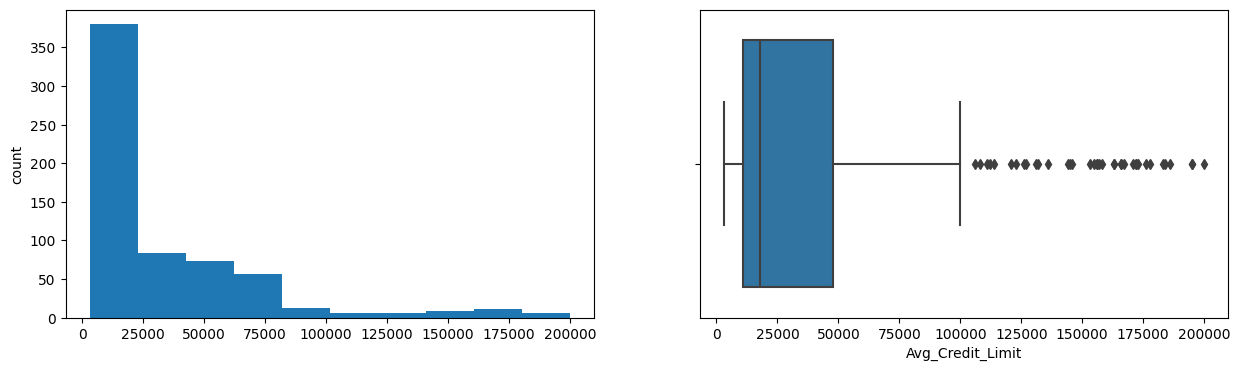

Total_Credit_Cards
Skew : 0.17


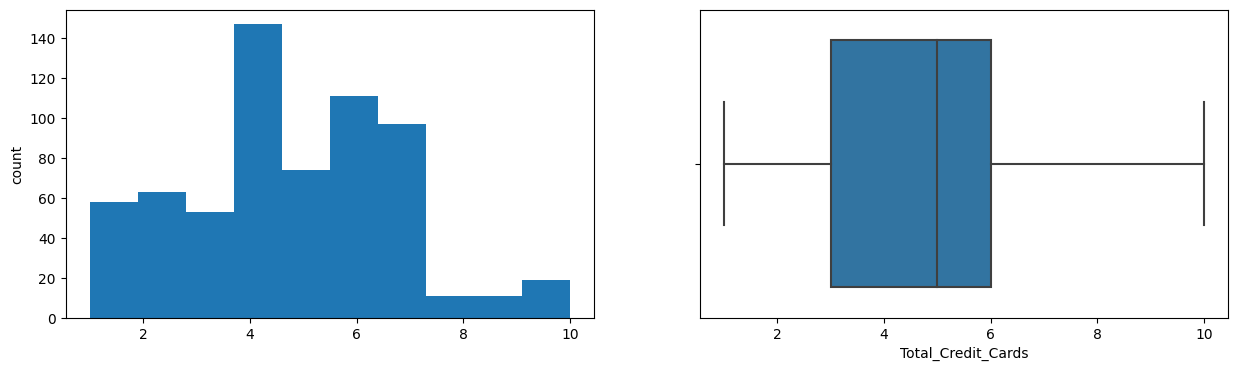

Total_visits_bank
Skew : 0.15


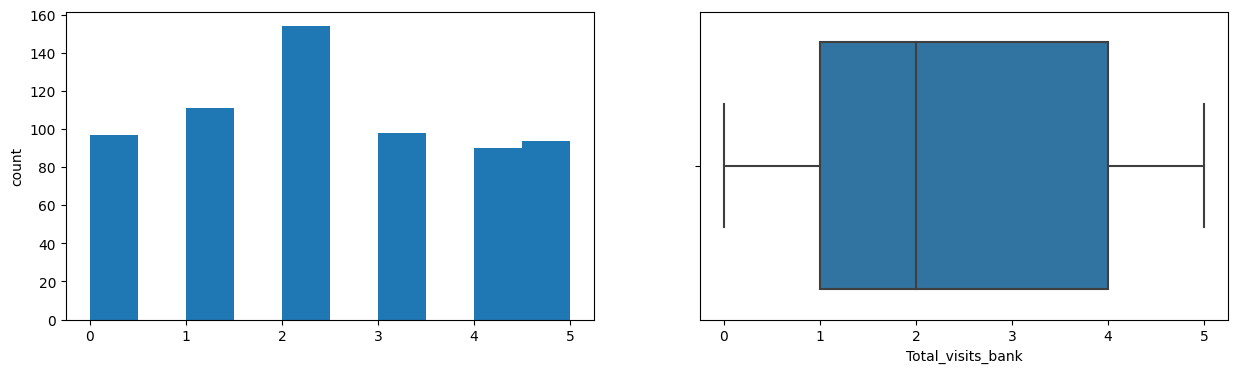

Total_visits_online
Skew : 2.21


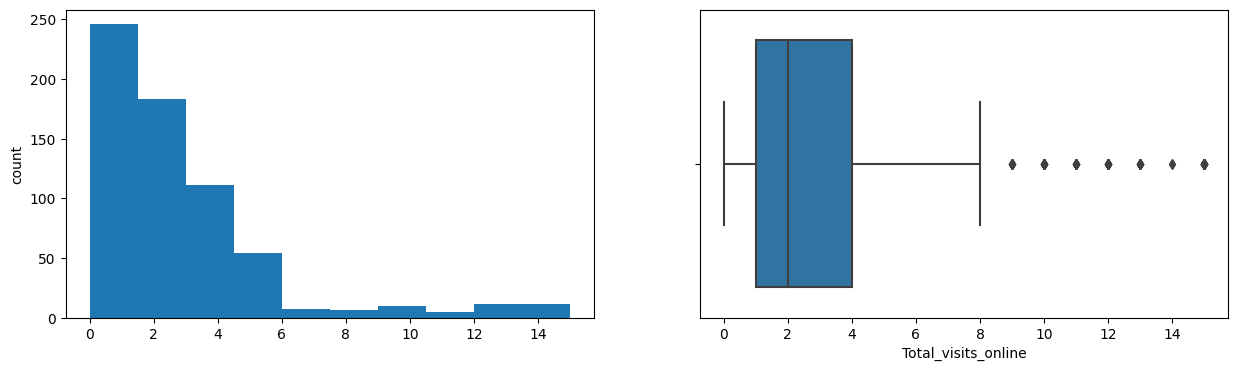

Total_calls_made
Skew : 0.65


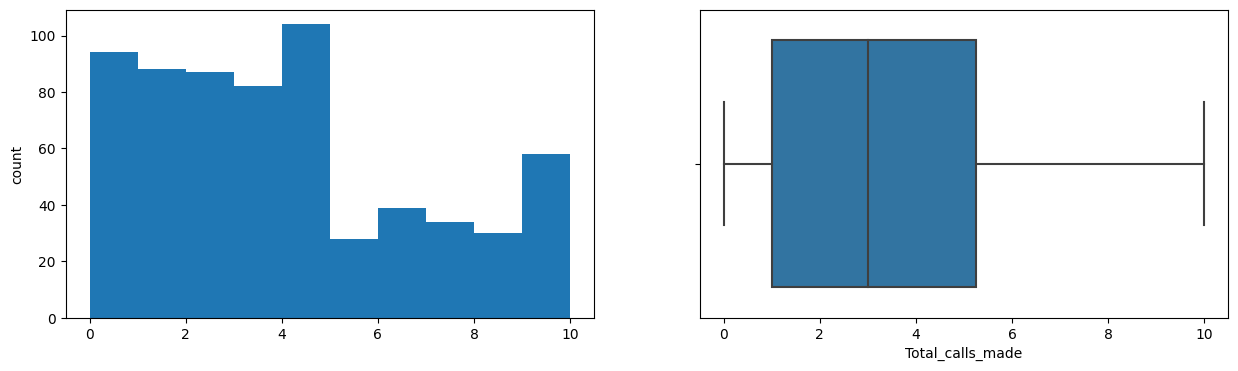

In [ ]:
for col in df_new.columns:
    print(col)

    print('Skew :', round(df_new[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    df_new[col].hist(grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = df_new[col])

    plt.show()

**Observations:**

*   As observed above, the average credit card limit has the largest right-skew (2.19) with the most outliers. The total visits online also has a large right-skew (2.21) with some outliers.
*   The total credit cards that a customer owns and the total visits they make to the bank in person have only a very slight right skew.
*   The total calls made to customer service by customers has a moderate right skew.

**Checking the correlation between variables**

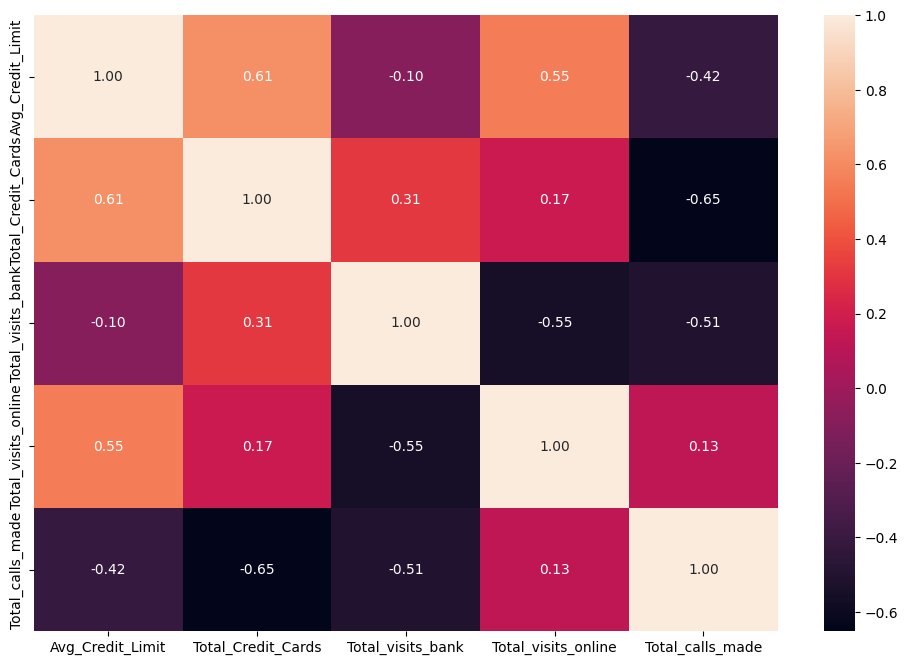

In [ ]:
plt.figure(figsize = (12, 8))

sns.heatmap(df_new.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

We can see a high positive correlation among the following variables:
1.   Avg_Credit_Limit and Total_Credit_Cards
2.   Avg_Credit_Limit and Total_visits_online
3. Total_Credit_Cards and Total_visits_online (smaller positive corr)

We can see a negative positive correlation among the following variables:
1. Total_Credit_Cards and Total_calls_made
2. Total_visits_bank and Total_calls_made
3. Avg_Credit_Limit and Total_calls_made

*   These correlations suggest that those with higher average credit limits tend to have more credit cards and vice versa. Similarly, those with higher average credit limits and more credit cards tend to make more visits online.
*   It seems that generally there is a negative correlation with making calls if you have a high average credit limit or a lot of credit cards which makes sense.
*   Total visits in person, online, or via phone are also negatively correlated - people have a strong preference for one over the other.

#### **Applying PCA on scaled data**

In [ ]:
#Scaling the data
scaler = StandardScaler()

# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(df_new)

In [ ]:
from sklearn.decomposition import PCA

n = df_new.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Save components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = df_new.columns)

In [ ]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

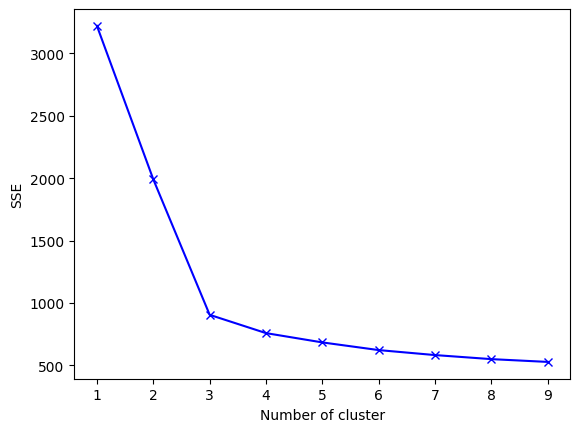

In [ ]:
# step 1
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

**Observations:**

*   We can see that there is a dip starting at 3 to 9 with a clear elbow at 3 and thus we will choose a value of K=3.

In [ ]:
# Apply the K-Means algorithm
kmeans = KMeans(n_clusters = 3, random_state = 1)

 # Fit the kmeans function on the pca components
kmeans.fit(data_scaled)

# Adding predicted labels to the original data and the scaled data
data_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
df_new['KMeans_Labels'] = kmeans.predict(data_scaled)

#### **Create the cluster profiles using the summary statistics and box plots for each label**

In [ ]:
df_new.KMeans_Labels.value_counts()

1    374
0    221
2     49
Name: KMeans_Labels, dtype: int64

In [ ]:
# Calculating summary statistics of the original data for each label
mean = df_new.groupby('KMeans_Labels').mean()

median = df_new.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


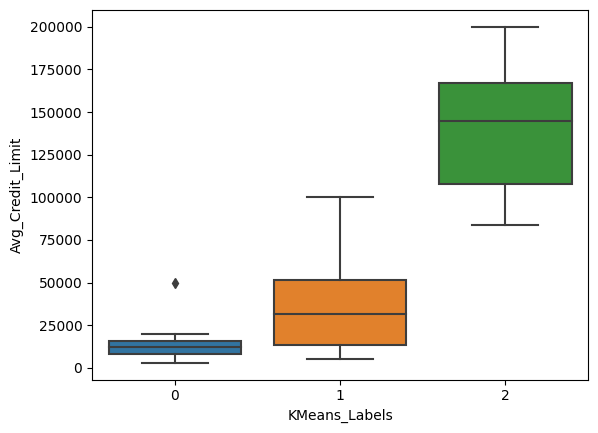

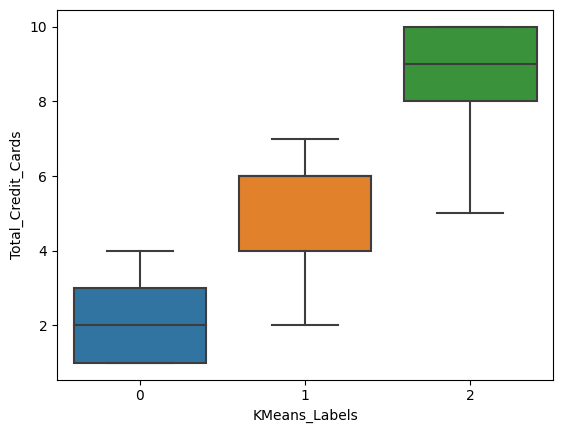

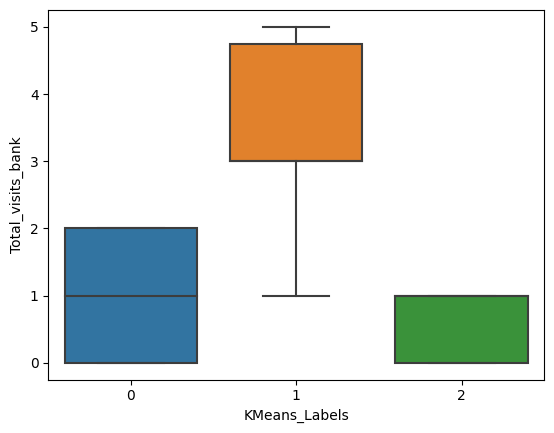

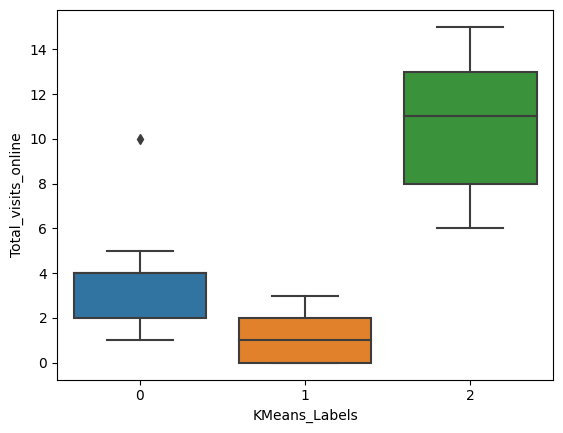

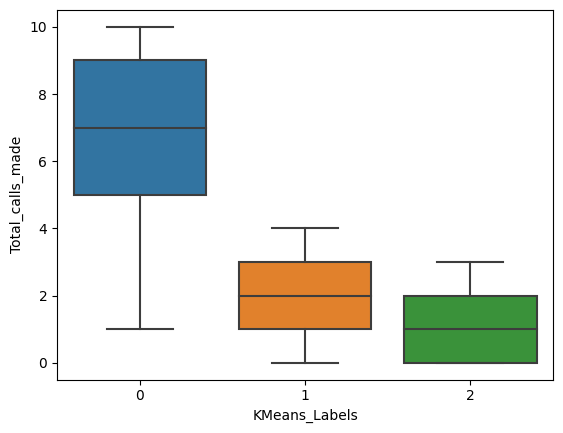

In [ ]:
cols_visualise = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = df_new)
    plt.show()

**Cluster Profiles Observations:**

*   It looks like **Cluster 2 belongs to those with the highest average credit limit who have the most credit cards**. The summary statistics also indicate that they tend to get most of their support for their banking activities online (mean is around 11 times). **This is the group with the fewest amount of observations (49) indicating they may be a higher income bracket and also have more reliable access to internet.**
*   **Cluster 1 are those that make most of their visits at the bank and they fall in the middle spectrum in terms of average credit limit and amount of credit cards owned.**
*   **Cluster 0 has the lowest credit limit and amount of credit cards. They are also the most likely to call the support center. This is likely the lowest income bracket.**



## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm.fit(data_scaled)

data_copy['GmmLabels'] = gmm.predict(data_scaled)

df_new['GmmLabels'] = gmm.predict(data_scaled)

In [ ]:
df_new.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

#### **Create the cluster profiles using the summary statistics and box plots for each label**


In [ ]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = df_new.groupby('GmmLabels').mean()

median = df_new.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

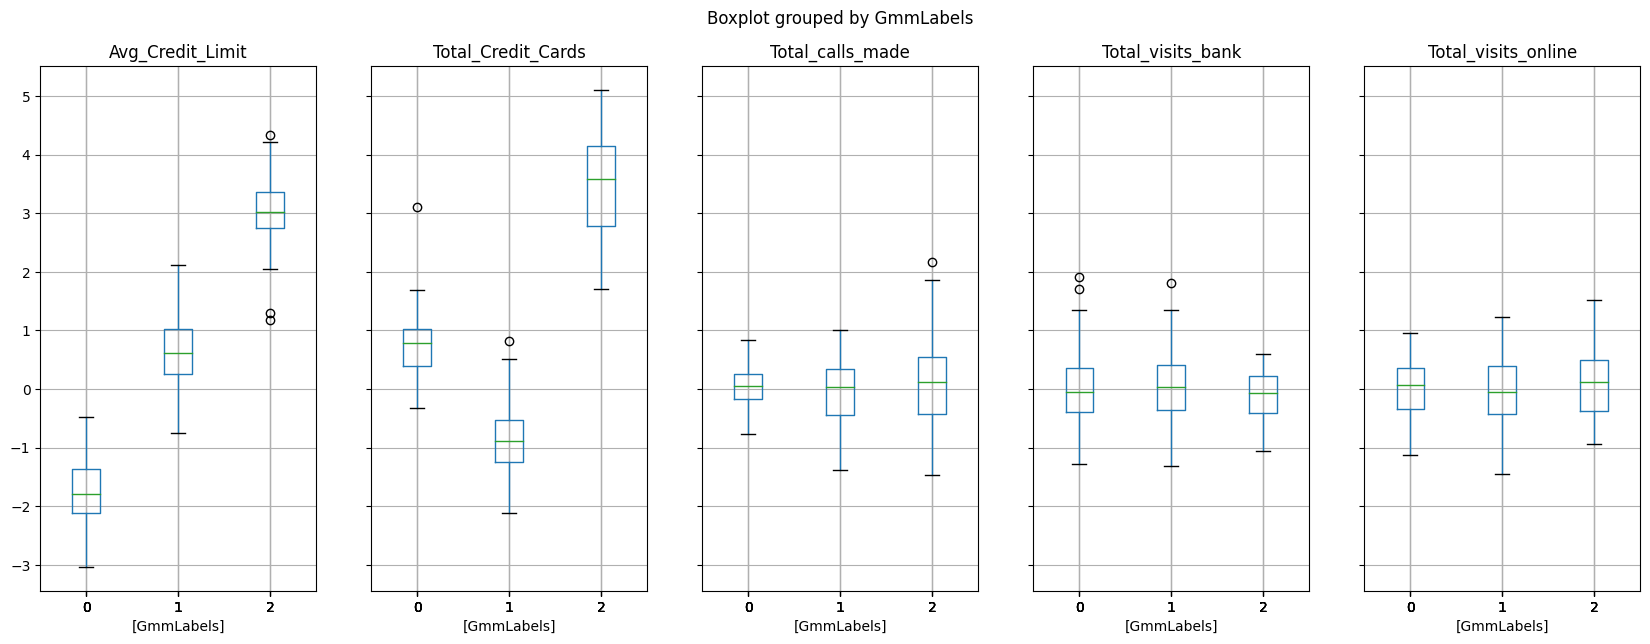

In [ ]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

**Comparing Clusters:**

*   **This clustering solution looks very similar to the once created using K-Means, differentiating between the groups that have the highest credit limit and amount of credit cards, the lowest credit limit, and those that fall somewhere in the middle.**
*   **Interestingly enough, Cluster 0 now seems to have more total credit cards. This might make sense given that they have the lowest credit card limits and are therefore likely to take out more credit cards with smaller limit values.**
*   Total visits online continue to be dominated by Cluster 2 while total calls made are dominated by Cluster 0.

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [ ]:
# Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1
kmedo = KMedoids(n_clusters = 3, random_state = 1)

# Fit the model on the pca components
kmedo.fit(data_scaled)

data_copy['kmedoLabels'] = kmedo.predict(data_scaled)

df_new['kmedoLabels'] = kmedo.predict(data_scaled)

In [ ]:
df_new.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

#### **Create cluster profiles using the summary statistics and box plots for each label**

In [ ]:
# Calculating summary statistics of the original data for each label
mean = df_new.groupby('kmedoLabels').mean()

median = df_new.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


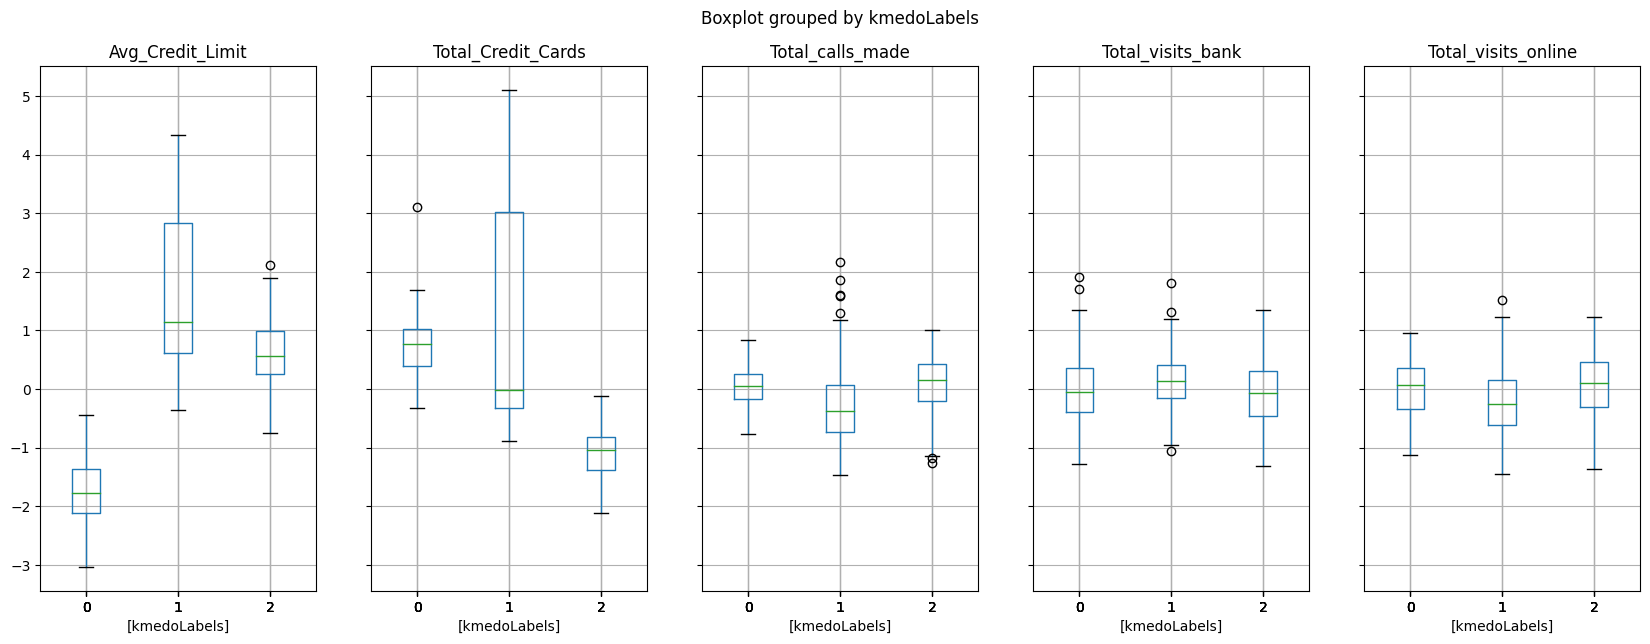

In [ ]:
# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**

*   **Cluster 1 now comprises of the most observations (222) in comparison to the other clusters.** It seems that much of the data from Cluster 1 in our K-Means clustering has now dispersed into Cluster 2.
*   **Cluster 1 now has the highest average credit limit and the most credit cards.**
*   **Cluster 0 still retains the same characteristic with the lowest average credit limit and as the Gaussian Mixture Model suggested, the most credit cards.** They are also still making the most calls to the call center.
*   **Cluster 2 now has the second highest average credit limit but the lowest amount of credit cards.** They now have a higher number of visits to the bank and are no longer the group with the most total visits online.


#### **Compare the clusters from K-Means and K-Medoids**

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12239.819005,2.423423,2.411765,0.950450,0.945701,3.554054,3.561086,6.878378,6.891403
group_1 Mean,85052.631579,33893.048128,7.030075,5.508021,1.691729,3.489305,4.639098,0.975936,1.969925,1.997326
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,31500.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Comparing Clusters:**

*   The number of observations for each cluster from **K-Medoids is more evenly distributed in comparison to K-Means** clustering.
*   This is because the clusters from K_Medoids are **less affected by outliers** from the data, even less than the Gaussian Mixture Model.
*   **Cluster 1 now has the highest average credit limit and the most observations (222).**
*   **Cluster 0 still retains the same characteristic of having the lowest average credit limit and as the Gaussian Mixture Model suggested, the most credit cards.**
*   **Cluster 2, given it is now a larger number of observations in the group (133), now has the second highest average credit limit but the lowest amount of credit cards.** Versus our results using K-Means, they are no longer the group with the most total visits online and instead seem to be doing more visits to the bank.


## **Conclusions and Business Recommendations**

*   Even after applying K-Medoids which allowed for a more evenly distributed comparison across the 3 clusters as compared to K-Means, it is clear that these groups have **large income discrepancies as well as preferences in communicating with the bank.**
*   Our lowest income group has the lowest average credit limit but uses the most amount of credit cards. Being able to take out loans on credit can be a benefit to this population but also a curse. **More credit can also mean more/higher initiation fees, interest rate fees, and overdraft fees.** This can be detrimental not only to the customer, but also to the bank and the overall economy. **The head of marketing should think about targeting this population with financial education advertisements so that they don't fall behind on paying their bills and are made aware of the (sometimes hidden) fees. This might also encourage these lower income groups to reach better financial health and eventually be able to open a savings or investment account with the bank.
The head of delivery on the other hand should have customer representatives check in on these customers on a more consistent basis (perhaps quarterly) given that their preferred way of communication is by telephone.**
*   **For the higher income bracket customers in Cluster 1 and 2, the bank can make a variety of improvements to their online services to make for better customer service and also upsell this customer base with new products and services. The head of delivery should work with the technology teams to make sure that the online services for customers in this group are up to par. They can solicit these customers for feedback on improvements and challenges they face with the bank's online service, run A/B testing to try out various product enhancements.**
*   **In order to upsell this market, they can also use the online platform to offer new investment products and services to increase revenues, e.g., 401K, ETFs, etc. in addition to checking and savings accounts. Simiarly, the bank can also implement additional rewards program (e.g., dollars back for every time a credit card is use or travel reward points) to encourage them to utilize their credit cards.**
*   The bank can also target new customers similar to the ones in Cluster 1 and 2 if they want to increase customer base here, e.g., based on age, income, industry, etc.